# Observations 

- The weight of the mouse has a positive correlation to the size of the tumor
- There's mostly a negative correlation between tumor volume and the time treated with Capomulin
- The effects of Capomulin or any treatment work equally well to both male and females

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats 

In [2]:
mouse_meta = pd.read_csv("Data/Mouse_metadata.csv")
study_results = pd.read_csv("Data/Study_results.csv")

In [3]:
mouse_meta

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
combined_results = pd.merge(mouse_meta,study_results, how='outer', on="Mouse ID")

In [6]:
combined_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
combined_results = combined_results.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
combined_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
combined_results = combined_results.sort_values(by=['Mouse ID','Timepoint'],ascending=False)
combined_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1892,z969,Naftisol,Male,9,30,45,73.867845,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1888,z969,Naftisol,Male,9,30,25,63.145652,2
...,...,...,...,...,...,...,...,...
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
456,a203,Infubinol,Female,20,23,10,51.852437,1
455,a203,Infubinol,Female,20,23,5,48.508468,0


In [9]:
combined_results = combined_results.drop_duplicates(subset=['Mouse ID'],keep='first')
combined_results 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1892,z969,Naftisol,Male,9,30,45,73.867845,4
1882,z795,Naftisol,Female,13,29,45,65.741070,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
84,z578,Ramicane,Male,11,16,45,30.638696,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
...,...,...,...,...,...,...,...,...
500,a366,Stelasyn,Female,16,29,30,63.440686,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
483,a262,Placebo,Female,17,29,45,70.717621,4
473,a251,Infubinol,Female,21,25,45,65.525743,1


In [10]:
regimen_mean = combined_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
regimen_median = combined_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimen_variance = combined_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_stdv = combined_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimen_sem = combined_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_drug = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median, "Variance": regimen_variance, "Standard Deviation": regimen_stdv, 
                          "SEM": regimen_sem})
summary_drug

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


Text(0.5, 1.0, 'Total Mice For Each Treatment ')

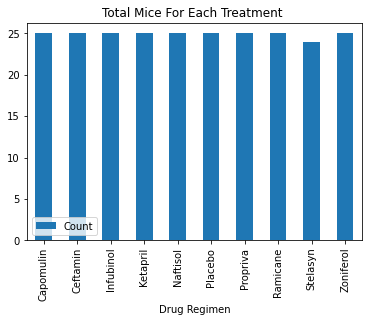

In [11]:
mice_amount = pd.DataFrame(combined_results.groupby(["Drug Regimen"]).count()).reset_index()
# Filter the DataFrame down only to those columns to chart
mice_amount_bar = mice_amount[["Drug Regimen","Mouse ID"]]
mice_amount_bar = mice_amount_bar.rename(columns={"Mouse ID": "Count"})
# Set the index to be "Drug Regimen" so they will be used as labels
mice_amount_bar = mice_amount_bar.set_index("Drug Regimen")
mice_amount_bar.plot(kind="bar")
plt.legend(loc='lower left')
plt.title("Total Mice For Each Treatment ")


In [12]:
mice_amount

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,25,25,25,25,25,25,25
1,Ceftamin,25,25,25,25,25,25,25
2,Infubinol,25,25,25,25,25,25,25
3,Ketapril,25,25,25,25,25,25,25
4,Naftisol,25,25,25,25,25,25,25
5,Placebo,25,25,25,25,25,25,25
6,Propriva,25,25,25,25,25,25,25
7,Ramicane,25,25,25,25,25,25,25
8,Stelasyn,24,24,24,24,24,24,24
9,Zoniferol,25,25,25,25,25,25,25


In [13]:
#regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
regimen = mice_amount['Drug Regimen']
amount_per_regimen = mice_amount.iloc[:,1]

No handles with labels found to put in legend.


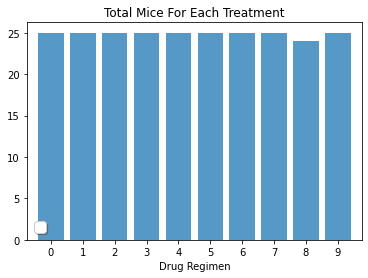

In [14]:
x_axis = np.arange(0, len(regimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Total Mice For Each Treatment")
plt.xlabel("Drug Regimen")

plt.xlim(-0.75, len(regimen)-.25)
#plt.ylim(0, max(amount_per_regimen) + 5)

plt.bar(x_axis, amount_per_regimen, alpha=0.75, align="center")
plt.xticks(tick_locations, x_axis)
legend = plt.legend(loc='lower left', shadow=True, fontsize='x-large')
plt.show()

<Figure size 720x432 with 0 Axes>

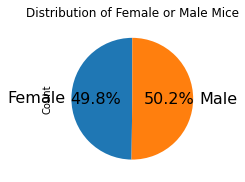

<Figure size 720x432 with 0 Axes>

In [15]:
pie_merge = pd.DataFrame(combined_results.groupby(["Sex"]).count()).reset_index()
pie_merge = pie_merge[["Sex","Mouse ID"]]
pie_merge = pie_merge.rename(columns={"Mouse ID": "Count"})
ax1 = plt.subplot(121, aspect='equal')
pie_merge.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=pie_merge['Sex'], legend = False, fontsize=16)
plt.title("Distribution of Female or Male Mice")
plt.figure(figsize=(10,6))


In [16]:
pie_merge

,Sex,Count
0,Female,124
1,Male,125


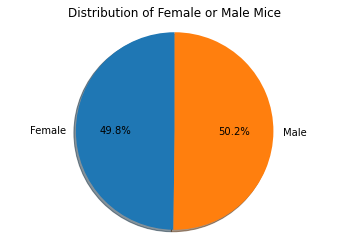

In [17]:
sex = pie_merge["Sex"]
count = pie_merge.iloc[:,1]
#colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
#explode = (0, 0.05, 0, 0)
plt.title("Distribution of Female or Male Mice")
plt.pie(count, labels=sex,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [18]:
combined_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1892,z969,Naftisol,Male,9,30,45,73.867845,4
1882,z795,Naftisol,Female,13,29,45,65.741070,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
84,z578,Ramicane,Male,11,16,45,30.638696,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
...,...,...,...,...,...,...,...,...
500,a366,Stelasyn,Female,16,29,30,63.440686,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
483,a262,Placebo,Female,17,29,45,70.717621,4
473,a251,Infubinol,Female,21,25,45,65.525743,1


In [19]:
top_drugs = combined_results[['Mouse ID',"Drug Regimen",'Tumor Volume (mm3)','Timepoint','Weight (g)']]
top_drugs

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint,Weight (g)
1892,z969,Naftisol,73.867845,45,30
1882,z795,Naftisol,65.741070,45,29
1872,z581,Infubinol,62.754451,45,25
84,z578,Ramicane,30.638696,45,16
1862,z435,Propriva,48.710661,10,26
...,...,...,...,...,...
500,a366,Stelasyn,63.440686,30,29
493,a275,Ceftamin,62.999356,45,28
483,a262,Placebo,70.717621,45,29
473,a251,Infubinol,65.525743,45,25


In [20]:
Drop_Zoniferol = top_drugs[ top_drugs['Drug Regimen'] == 'Zoniferol' ].index
top_drugs.drop(Drop_Zoniferol , inplace=True)

Drop_Ketapril = top_drugs[ top_drugs['Drug Regimen'] == 'Ketapril' ].index
top_drugs.drop(Drop_Ketapril , inplace=True)

Drop_Naftisol = top_drugs[ top_drugs['Drug Regimen'] == 'Naftisol' ].index
top_drugs.drop(Drop_Naftisol , inplace=True)

Drop_Placebo = top_drugs[ top_drugs['Drug Regimen'] == 'Placebo' ].index
top_drugs.drop(Drop_Placebo , inplace=True)

Drop_Propriva = top_drugs[ top_drugs['Drug Regimen'] == 'Propriva' ].index
top_drugs.drop(Drop_Propriva , inplace=True)

Drop_Stelasyn = top_drugs[ top_drugs['Drug Regimen'] == 'Stelasyn' ].index
top_drugs.drop(Drop_Stelasyn , inplace=True)


top_drugs = top_drugs.sort_values(by=['Mouse ID','Drug Regimen'],ascending=True)

top_drugs

C:\Users\harol\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint,Weight (g)
463,a203,Infubinol,67.973419,45,23
473,a251,Infubinol,65.525743,45,25
493,a275,Ceftamin,62.999356,45,28
327,a411,Ramicane,38.407618,45,22
430,a444,Ramicane,43.047543,45,25
...,...,...,...,...,...
1845,y769,Ceftamin,68.594745,45,27
124,y793,Capomulin,31.896238,45,17
1855,y865,Ceftamin,64.729837,45,26
84,z578,Ramicane,30.638696,45,16


In [21]:
tumor_volume = top_drugs["Tumor Volume (mm3)"]
quartiles = tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volumne is: {lowerq}")
print(f"The upper quartile of Tumor Volumne is: {upperq}")
print(f"The interquartile range of Tumor Volumne is: {iqr}")
print(f"The the median of Tumor Volumne is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volumne is: 37.1877438025
The upper quartile of Tumor Volumne is: 59.930261755
The interquartile range of Tumor Volumne is: 22.742517952499995
The the median of Tumor Volumne is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


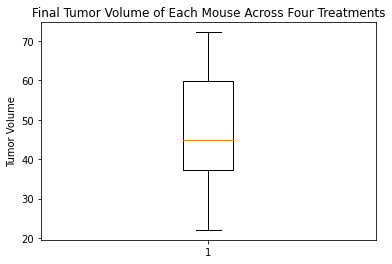

In [22]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse Across Four Treatments')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_volume)
plt.show()

In [23]:
Drop_Infubinol = top_drugs[ top_drugs['Drug Regimen'] == 'Infubinol' ].index
top_drugs.drop(Drop_Infubinol , inplace=True)

Drop_Ceftamin = top_drugs[ top_drugs['Drug Regimen'] == 'Ceftamin' ].index
top_drugs.drop(Drop_Ceftamin , inplace=True)

Drop_Ramicane = top_drugs[ top_drugs['Drug Regimen'] == 'Ramicane' ].index
top_drugs.drop(Drop_Ramicane , inplace=True)

top_drugs


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint,Weight (g)
309,b128,Capomulin,38.982878,45,22
299,b742,Capomulin,38.939633,45,21
64,f966,Capomulin,30.485985,20,17
244,g288,Capomulin,37.074024,45,19
360,g316,Capomulin,40.159220,45,22
440,i557,Capomulin,47.685963,45,24
204,i738,Capomulin,37.311846,45,20
337,j119,Capomulin,38.125164,45,23
317,j246,Capomulin,38.753265,35,21
380,l509,Capomulin,41.483008,45,21


In [24]:
capomulin_data = top_drugs[['Tumor Volume (mm3)','Timepoint']]
capomulin_data = capomulin_data.sort_values(by=['Timepoint','Tumor Volume (mm3)'],ascending=True)

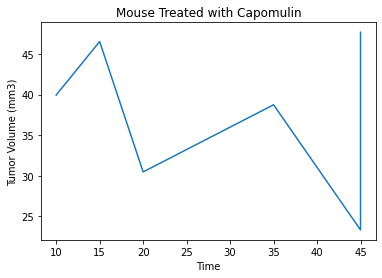

In [25]:
plt.title('Mouse Treated with Capomulin')
plt.xlabel('Time')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

In [26]:
top_drugs

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint,Weight (g)
309,b128,Capomulin,38.982878,45,22
299,b742,Capomulin,38.939633,45,21
64,f966,Capomulin,30.485985,20,17
244,g288,Capomulin,37.074024,45,19
360,g316,Capomulin,40.159220,45,22
440,i557,Capomulin,47.685963,45,24
204,i738,Capomulin,37.311846,45,20
337,j119,Capomulin,38.125164,45,23
317,j246,Capomulin,38.753265,35,21
380,l509,Capomulin,41.483008,45,21


In [27]:
capomulin_scatter = top_drugs[['Drug Regimen','Tumor Volume (mm3)','Weight (g)']]
capomulin_scatter = capomulin_scatter.groupby('Tumor Volume (mm3)').mean()

In [28]:
capomulin_scatter

,Weight (g)
Tumor Volume (mm3),
23.343598,17
28.430964,17
28.484033,15
30.485985,17
31.023923,17
31.896238,17
32.377357,17
33.329098,19
34.455298,17


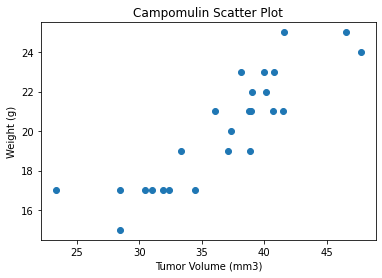

In [29]:
x = top_drugs['Tumor Volume (mm3)']
y = top_drugs['Weight (g)']

plt.title('Campomulin Scatter Plot')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.scatter(x, y)
plt.show()

In [30]:
mouse_weight = top_drugs.iloc[:,4]
average_tumor_volume = top_drugs.iloc[:,2]
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.88


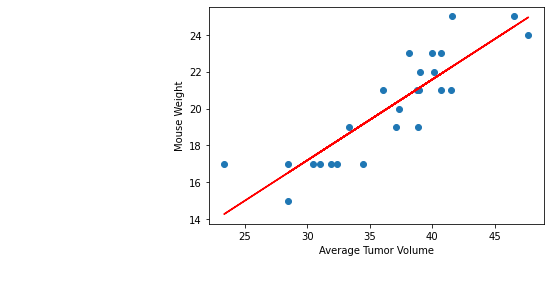

In [31]:
x= top_drugs['Tumor Volume (mm3)']
y = top_drugs['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_equation,(6,10),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume')
plt.ylabel('Mouse Weight')
plt.show()